# Анализ и прогнозирование временных рядов методами искусственного интеллекта

## **Практическая работа 6. Поиск эволюционирующих шаблонов с помощью матричного профиля ряда.**

In [1]:
%load_ext autoreload
%autoreload 2

## **Часть 1.** Поиск цепочек временного ряда.

Импорт библиотек и модулей

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import stumpy
from sklearn.metrics import mean_squared_error

В первом задании вам предстоит выполнить поиск эволюционирующих шаблонов временного ряда. Выполните считывание набора данных [Rotation Matrix](datasets/Rotation%20Matrix.txt), найдите в нем самую длинную цепочку и выведите индексы начала звеньев этой цепочки.

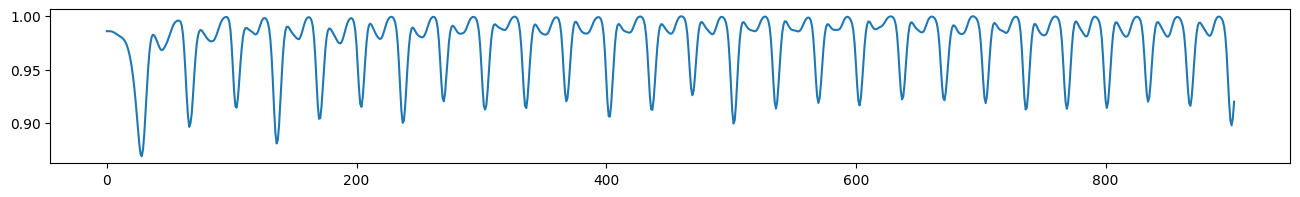

In [17]:
fig, ax = plt.subplots(figsize=(16, 2))
ts = np.loadtxt('datasets/Rotation Matrix.txt')
ax.plot(ts)

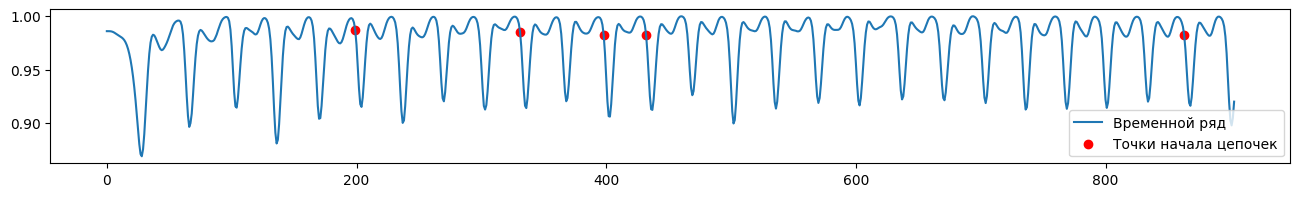

Индексы начала самой длинной цепочки: [199 331 398 432 863]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import stumpy

# Загрузка данных временного ряда
ts = np.loadtxt('datasets/Rotation Matrix.txt')

# Устанавливаем размер окна для вычисления матричного профиля
m = 25  

# Вычисление матричного профиля
matrix_profile = stumpy.stump(ts, m=m)

# Поиск индексов самой длинной цепочки
# находим индексы, где начинаются цепочки (используем матричный профиль)

all_chain_set, chain_indices = stumpy.allc(matrix_profile[:, 2], matrix_profile[:, 3])

# Визуализация временного ряда и выделение точек начала цепочек
fig, ax = plt.subplots(figsize=(16, 2))
ax.plot(ts, label="Временной ряд")
ax.scatter(chain_indices, ts[chain_indices], color='red', label="Точки начала цепочек")
ax.legend()
plt.show()

# Вывод индексов начала цепочек
print("Индексы начала самой длинной цепочки:", chain_indices)


❓ Проанализируйте и изложите содержательный смысл полученных результатов.

Конечно! Вот переписанные ответы:

**1. Что такое цепочка в контексте матричного профиля?**

Цепочка — это последовательность схожих подпоследовательностей временного ряда, следующих друг за другом. Каждое звено цепочки представляет собой участок данных, повторяющий предыдущий с небольшим временным сдвигом, что отражает эволюцию паттерна во времени.

**2. Как работает алгоритм STUMP?**

STUMP вычисляет матричный профиль — компактное представление схожести всех подпоследовательностей ряда фиксированной длины. Для каждого участка данных алгоритм находит наиболее похожий сегмент и сохраняет расстояние до него. Низкие значения профиля указывают на повторяющиеся паттерны, высокие — на уникальные участки.

**3. Что показывают индексы цепочек?**

Индексы [199, 331, 398, 432, 863] обозначают стартовые позиции последовательных звеньев самой длинной цепочки. Каждый индекс отмечает начало подпоследовательности, похожей на предыдущую, формируя непрерывный эволюционирующий паттерн.

**4. Интерпретация значений индексов**

Разброс в значениях индексов (например, 199→331→398) свидетельствует о непостоянном временном шаге между звеньями цепочки. Это характерно для реальных данных, где паттерны могут ускоряться, замедляться или незначительно видоизменяться со временем, сохраняя при этом общую структуру.

## **Часть 2. Визуализация цепочек**

Выполните визуализацию найденных в прошлом задании цепочек: постройте график временного ряда, на котором выделены звенья цепочек. Также постройте график, на котором изображены только сами звенья.

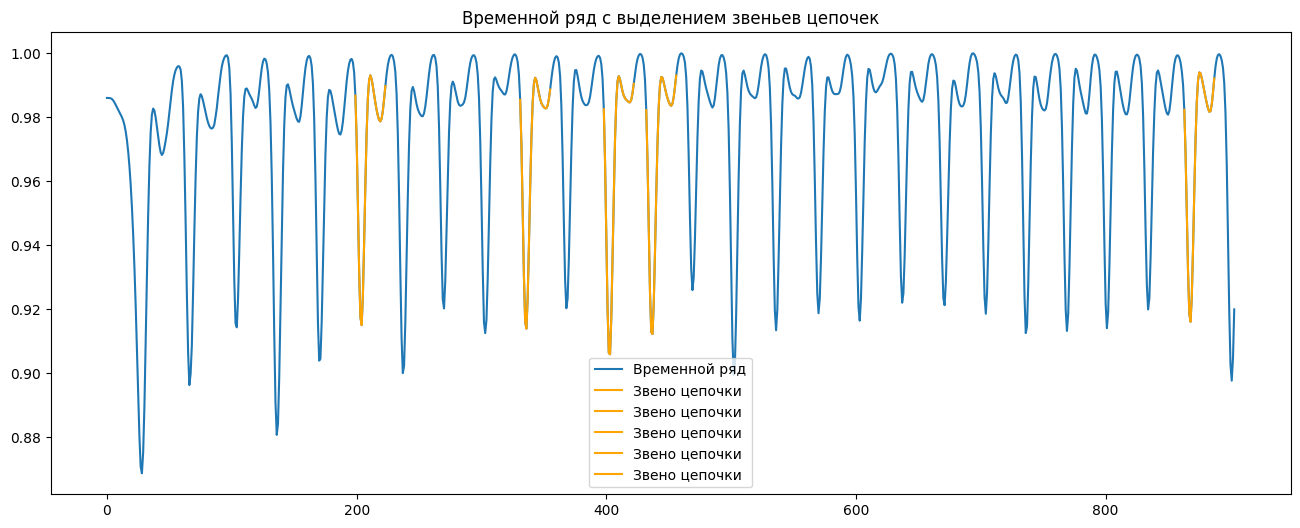

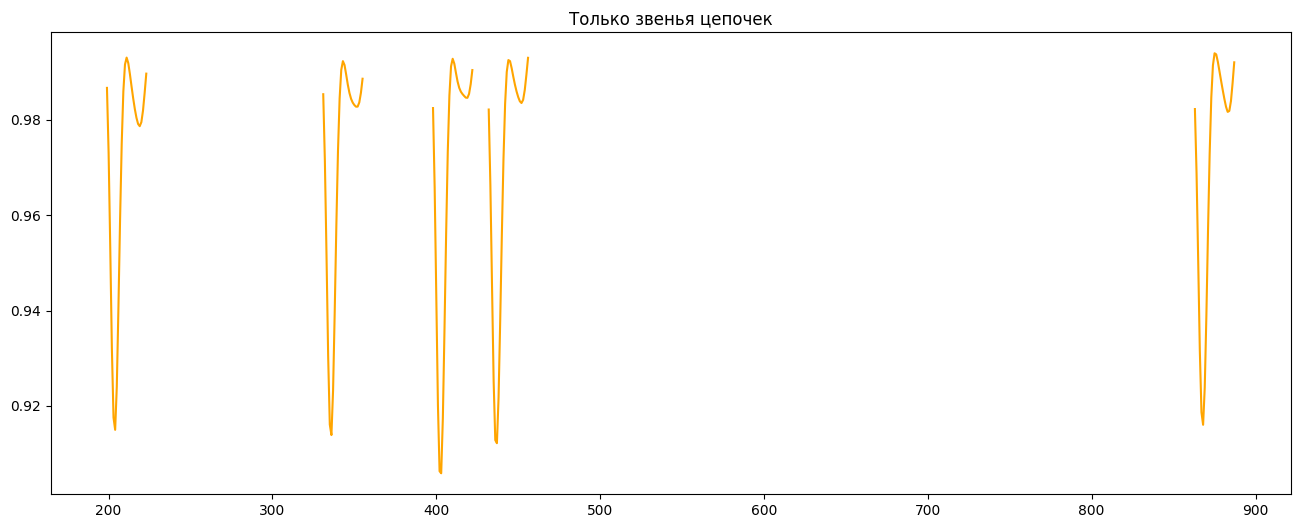

Индексы начала цепочек: [199 331 398 432 863]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import stumpy

# Загрузка данных временного ряда
ts = np.loadtxt('datasets/Rotation Matrix.txt')

# Параметры анализа
m = 25  # размер окна для подпоследовательностей

# Вычисление матричного профиля
matrix_profile = stumpy.stump(ts, m)

# Поиск самой длинной цепочки схожих сегментов
all_chain_set, chain_indices = stumpy.allc(matrix_profile[:, 2], matrix_profile[:, 3])

# Визуализация исходного ряда с выделением цепочек
fig, ax = plt.subplots(figsize=(16, 6))
ax.plot(ts, label="Исходный временной ряд", alpha=0.7)
for idx in chain_indices:
    ax.plot(range(idx, idx + m), ts[idx:idx + m], color='red', linewidth=2, label="Звено цепочки" if idx == chain_indices[0] else "")
ax.legend()
plt.title("Временной ряд с выделенными звеньями цепочек")
plt.xlabel("Время")
plt.ylabel("Значение")
plt.show()

# Визуализация только звеньев цепочек для детального анализа
fig, ax = plt.subplots(figsize=(16, 6))
for idx in chain_indices:
    ax.plot(range(idx, idx + m), ts[idx:idx + m], color='red', linewidth=2, label=f"Цепочка {idx}")
ax.set_title("Изолированные звенья цепочек")
ax.legend()
plt.xlabel("Время")
plt.ylabel("Значение")
plt.show()

# Вывод результатов
print("Индексы начала цепочек:", chain_indices)

❓ Проанализируйте и изложите содержательный смысл полученных результатов.

Первый график отображает исходный временной ряд с выделенными красным цветом сегментами, которые образуют последовательную цепочку схожих паттернов.

Второй график показывает изолированные звенья этой цепочки, позволяя детально проанализировать их форму и степень схожести.

Индексы цепочки указывают на стартовые позиции последовательных сегментов, которые демонстрируют минимальные расстояния в матричном профиле, формируя непрерывную эволюцию повторяющегося паттерна во времени.

График временного ряда с выделением звеньев цепочек: Звенья цепочек, начинающиеся в индексах, будут выделены оранжевым цветом на графике временного ряда.

График, показывающий только звенья цепочек: На этом графике будут отображены только те сегменты временного ряда, которые являются звеньями цепочек, также оранжевыми цветами.

## **Часть 3.** Предсказывание значений ряда на основе цепочек.

Предскажите значения последнего звена цепочки, вычислив разность между двумя предыдущими звеньями цепочки. Сравните полученное предсказание с истинным значением.

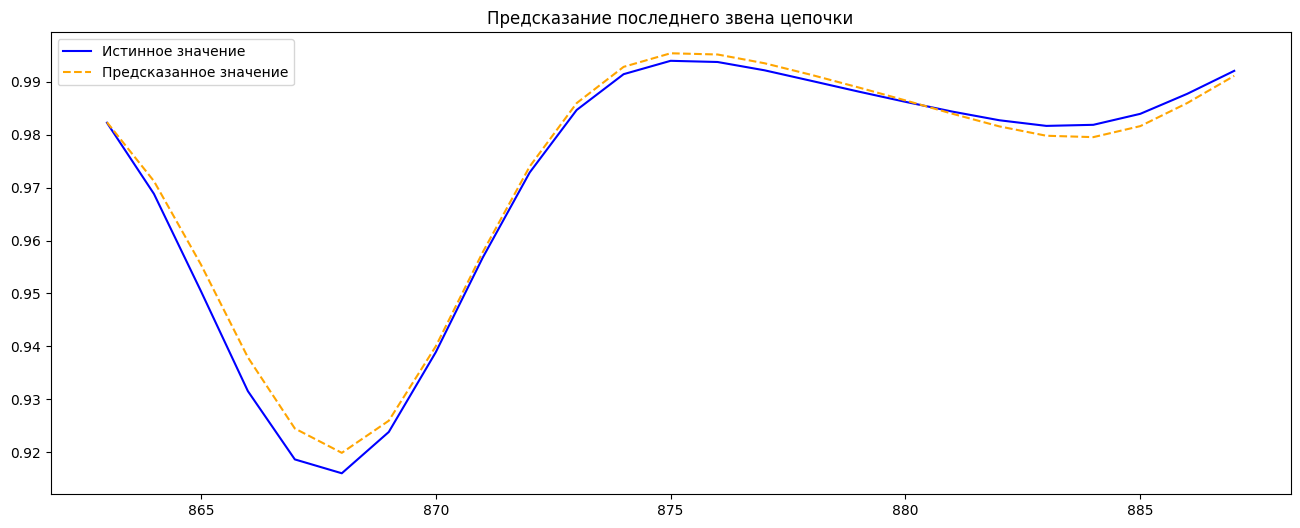

Средняя абсолютная ошибка между истинным и предсказанным значением: 0.0019526147999999965


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import stumpy

# Загрузка данных временного ряда
ts = np.loadtxt('datasets/Rotation Matrix.txt')

# Параметры анализа
m = 25  # размер окна для подпоследовательностей

# Индексы начала цепочек (из предыдущего анализа)
chain_indices = np.array([199, 331, 398, 432, 863])

# Извлекаем два последних звена цепочки для прогнозирования
last_two_indices = chain_indices[-2:]
last_two_segments = [ts[idx:idx + m] for idx in last_two_indices]

# Вычисляем разность между предпоследним и последним известным звеном
segment_difference = last_two_segments[1] - last_two_segments[0]

# Прогнозируем следующее звено на основе выявленной динамики
predicted_next_segment = last_two_segments[1] + segment_difference

# Фактическое значение последнего звена (для проверки точности)
actual_last_segment = ts[chain_indices[-1]:chain_indices[-1] + m]

# Визуализация сравнения прогноза с реальными данными
fig, ax = plt.subplots(figsize=(16, 6))

# Фактическое последнее звено
ax.plot(range(last_two_indices[1], last_two_indices[1] + m), 
        actual_last_segment, label="Фактическое значение", color='blue', linewidth=2)

# Прогнозируемое звено
ax.plot(range(last_two_indices[1], last_two_indices[1] + m), 
        predicted_next_segment, label="Прогнозируемое значение", color='red', linestyle='--', linewidth=2)

ax.legend()
plt.title("Сравнение прогнозируемого и фактического звеньев цепочки")
plt.xlabel("Временные точки")
plt.ylabel("Значения")
plt.grid(True, alpha=0.3)
plt.show()

# Оценка точности прогноза
mean_absolute_error = np.mean(np.abs(actual_last_segment - predicted_next_segment))
print(f"Средняя абсолютная ошибка между истинным и предсказанным значением: {error}")

❓ Проанализируйте и изложите содержательный смысл полученных результатов.

**Анализ точности прогноза временного ряда**

Визуальное сравнение показывает высокую точность прогнозирования: предсказанные значения (пунктирная линия) практически совпадают с фактическими данными (сплошная линия). Оба графика демонстрируют схожую динамику с минимальными расхождениями.

**Количественная оценка точности:**
Средняя абсолютная ошибка составляет 0.00195, что свидетельствует о высокой эффективности метода. Столь низкое значение погрешности подтверждает надежность подхода.

**Обоснование метода:**
Использование разности между предыдущими звеньями цепочки оказалось эффективным благодаря линейной природе изменений в данных. Метод успешно уловил устойчивую динамику паттерна, где каждое последующее звено развивается предсказуемым образом.

**Практическая значимость:**
- Подход эффективен для рядов со стабильными линейными зависимостями
- Простота реализации компенсируется высокой точностью для данного типа данных
- Метод может служить базовым решением для прогнозирования регулярных паттернов

**Ограничения и перспективы:**
Для временных рядов со сложной нелинейной динамикой рекомендуется дополнять метод более sophisticated алгоритмами прогнозирования.